In [10]:
import pandas as pd
housing= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
housing.info()
print(housing.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952     

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins=30, figsize=(15, 12))
plt.suptitle("Histogram of All Features")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [7]:
# Create income category
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, 100],
                               labels=[1,2,3,4,5])
housing.head()

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]

print("Train size:", len(strat_train))
print("Test size:", len(strat_test))
print("Total:", len(housing))



Train size: 16512
Test size: 4128
Total: 20640


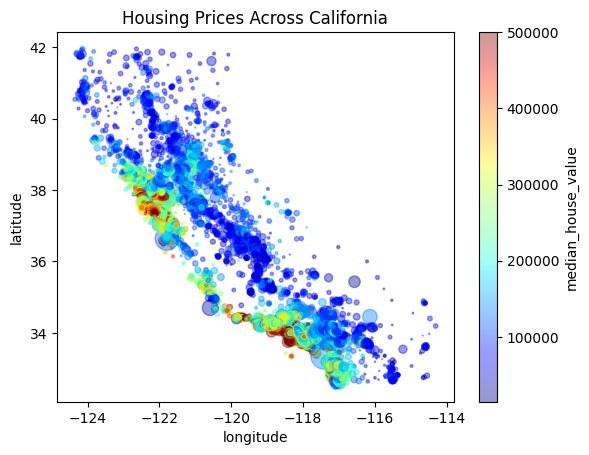

In [3]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             c="median_house_value",
             cmap="jet",
             colorbar=True)
plt.title("Housing Prices Across California")
plt.show()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


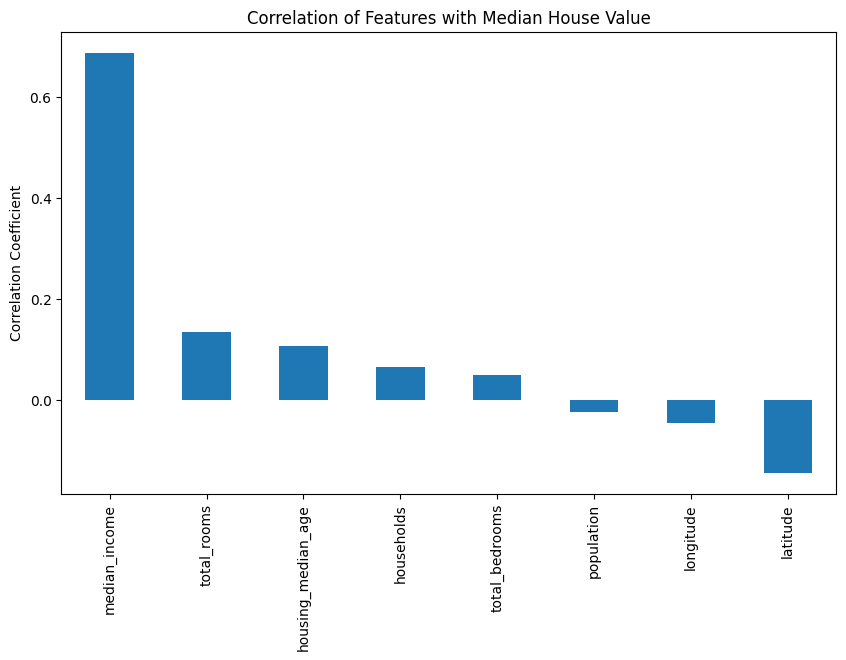

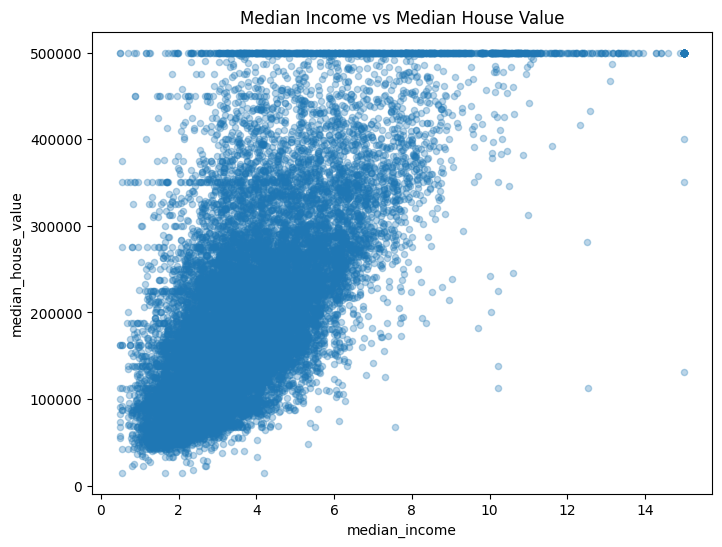

In [ ]:
# Select only numerical columns
housing_num = housing.select_dtypes(include=["number"])

# Correlation matrix
corr = housing_num.corr()

# Correlation of all features with house price
corr_price = corr["median_house_value"].sort_values(ascending=False)

print(corr_price)
corr_price.drop("median_house_value").plot(kind="bar", figsize=(10,6))
plt.title("Correlation of Features with Median House Value")
plt.ylabel("Correlation Coefficient")
plt.show()

housing.plot(kind="scatter",
             x="median_income",
             y="median_house_value",
             alpha=0.3,
             figsize=(8,6))

plt.title("Median Income vs Median House Value")
plt.show()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


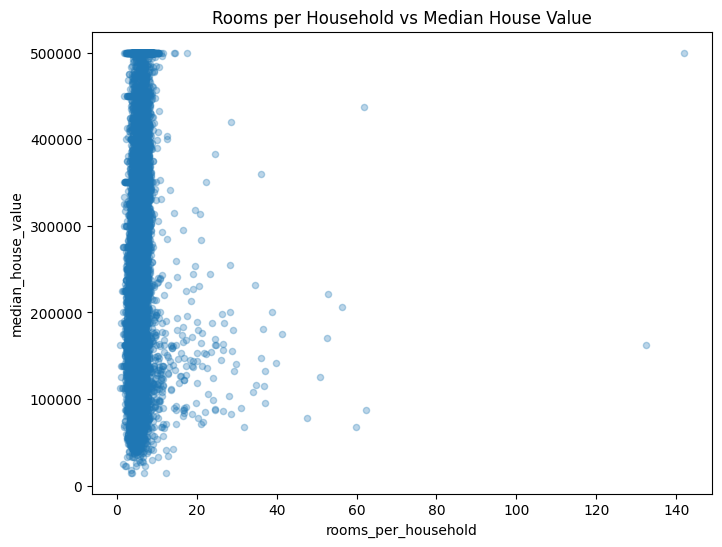

In [ ]:
# Create new combined features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

housing["population_per_household"] = housing["population"] / housing["households"]

housing_num = housing.select_dtypes(include=["number"])
corr_new = housing_num.corr()
corr_price_new = corr_new["median_house_value"].sort_values(ascending=False)
print(corr_price_new)
housing.plot(kind="scatter",
             x="rooms_per_household",
             y="median_house_value",
             alpha=0.3,
             figsize=(8,6))

plt.title("Rooms per Household vs Median House Value")
plt.show()




In [ ]:
# Check missing values
housing.isnull().sum()
from sklearn.impute import SimpleImputer
# Select numerical columns
housing_num = housing.select_dtypes(include=["number"])

# Create imputer
imputer = SimpleImputer(strategy="median")

# Fit and transform
housing_clean_array = imputer.fit_transform(housing_num)

# Convert back to DataFrame
housing_clean = pd.DataFrame(housing_clean_array,
                             columns=housing_num.columns)
# Check again
housing_clean.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
rooms_per_household,0


In [ ]:
housing.dtypes
# One-hot encoding using pandas
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])

# Display first 5 rows
housing_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,False,False,False,True,False


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        bedrooms_per_room = X[:,4] / X[:,3]
        population_per_household = X[:,5] / X[:,6]

        return np.c_[X,
                     rooms_per_household,
                     bedrooms_per_room,
                     population_per_household]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = housing.select_dtypes(include=["number"]).columns
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared.shape)

full_pipeline.fit_transform(housing)


(20640, 20)


array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])